### ランダムフォレスト　パラメータチューニング

In [1]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import  confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree.export import export_text

import graphviz

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# pickle ファイルから読み込み
train_pkl = pd.read_pickle('./pd_train.pk2')

In [3]:
pd.__version__

'1.0.3'

In [4]:
train_pkl.shape

(891, 15)

In [5]:
# Age, Fare は削除
# ダミー変数の先頭は削除
train_pkl.drop(['Age', 'Fare', 'Sex_female', 'Embarked_C', 'Pclass_2'], inplace=True, axis=1)

In [6]:
# 訓練とテストデータに分割
train, test = train_test_split(train_pkl, test_size=0.2, random_state=42)

In [7]:
# ターゲットと特徴量の分割
train_X = train.iloc[:, 1:].values
train_y = train.Survived.values

In [16]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(1, 11)],
    'min_samples_split': [i for i in range(2, 11)],
    'min_samples_leaf': [i for i in range(1, 11)],
    'random_state': [42]
}


In [17]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(**grid_param), param_grid=grid_param, scoring='accuracy', cv=5, return_train_score=False)

In [18]:
gs.fit(train_X, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion=['gini', 'entropy'],
                                              max_depth=[1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10],
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=[1, 2, 3, 4, 5,
                                                                6, 7, 8, 9,
                                                                10],
                                              min_samples_split=[2, 3, 4, 5, 6,
                                                                 7, 8, 9, 10],
  

In [19]:
gs.best_score_

0.8314291342460356

In [20]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [21]:
gs.cv_results_['mean_test_score']

array([0.7878755 , 0.7878755 , 0.7878755 , ..., 0.80760366, 0.82020093,
       0.80760366])

In [23]:
DT = DecisionTreeClassifier(**gs.best_params_)

In [24]:
DT = DT.fit(train_X, train_y)

[Text(167.4, 190.26, 'X[4] <= 0.5\nentropy = 0.955\nsamples = 712\nvalue = [444, 268]'),
 Text(83.7, 135.9, 'X[8] <= 0.5\nentropy = 0.829\nsamples = 245\nvalue = [64, 181]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 2.5\nentropy = 0.235\nsamples = 130\nvalue = [5, 125]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.349\nsamples = 61\nvalue = [4, 57]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.109\nsamples = 69\nvalue = [1, 68]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 115\nvalue = [59, 56]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.987\nsamples = 97\nvalue = [42, 55]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 0.5\nentropy = 0.694\nsamples = 467\nvalue = [380, 87]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 2.5\nentropy = 0.978\nsamples = 29\nvalue = [12, 17]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.0\nsamp

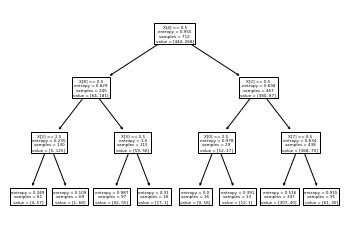

In [25]:
tree.plot_tree(DT.fit(train_X, train_y))

In [26]:
# export_text(DT, feature_names=train.iloc[:, 1:].columns)

In [27]:
train.Survived.name

'Survived'

In [28]:
len(train.iloc[:, 1:].columns), train.iloc[:, 1:].columns

(9,
 Index(['SibSp', 'Parch', 'Age_bin', 'Fare_bin', 'Sex_male', 'Embarked_Q',
        'Embarked_S', 'Pclass_1', 'Pclass_3'],
       dtype='object'))

In [29]:
# 訓練済みの決定木を視覚化
dot_data = tree.export_graphviz(DT, out_file=None,
                               feature_names=train.iloc[:, 1:].columns,
                               class_names=train.Survived.name,
                               rounded=True,
                               filled=True,
                               special_characters=True)

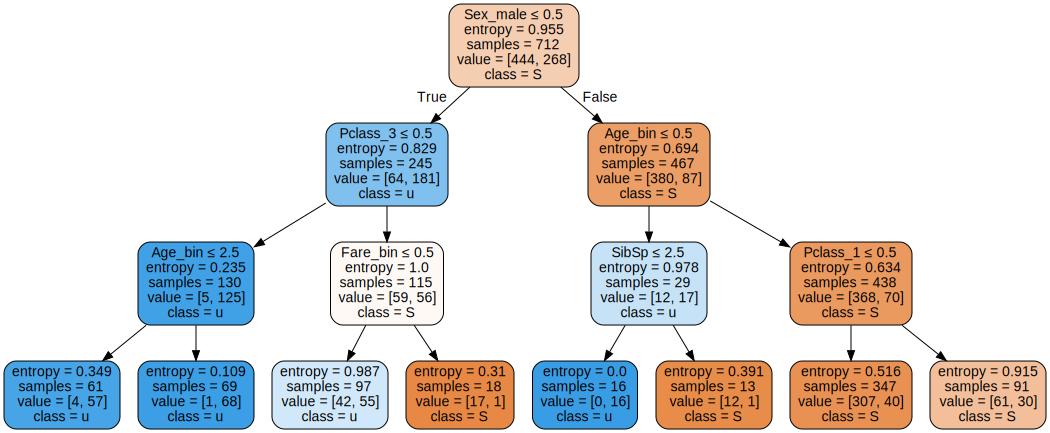

In [30]:
graph = graphviz.Source(dot_data)
graph

In [31]:
# graph.write('.\DT.png')

In [32]:
type(train_X)

numpy.ndarray

In [33]:
DT.feature_importances_

array([0.08232097, 0.        , 0.06949722, 0.04818726, 0.54204946,
       0.        , 0.        , 0.05474655, 0.20319854])

In [34]:
# 特徴量の重要度が高い順に表示
print("特徴量の重要度が高い順：")
# sorted：reverse=True 降順
print(sorted(
    zip(map(lambda x: round(x, 3), DT.feature_importances_), train.iloc[:, 1:].columns),
    reverse=True))

特徴量の重要度が高い順：
[(0.542, 'Sex_male'), (0.203, 'Pclass_3'), (0.082, 'SibSp'), (0.069, 'Age_bin'), (0.055, 'Pclass_1'), (0.048, 'Fare_bin'), (0.0, 'Parch'), (0.0, 'Embarked_S'), (0.0, 'Embarked_Q')]


In [35]:
sorted(
    zip(map(lambda x: round(x, 3), DT.feature_importances_), train.iloc[:, 1:].columns),
    reverse=True)

[(0.542, 'Sex_male'),
 (0.203, 'Pclass_3'),
 (0.082, 'SibSp'),
 (0.069, 'Age_bin'),
 (0.055, 'Pclass_1'),
 (0.048, 'Fare_bin'),
 (0.0, 'Parch'),
 (0.0, 'Embarked_S'),
 (0.0, 'Embarked_Q')]

In [36]:
# ターゲットと特徴量の分割
test_x = test.iloc[:, 1:].values
test_y = test.Survived.values

In [37]:
test_x.shape, test_y.shape

((179, 9), (179,))

In [38]:
pred_y = DT.predict(test_x)

In [39]:
confusion_matrix(test_y, pred_y)

array([[92, 13],
       [21, 53]], dtype=int64)

In [40]:
accuracy_score(test_y, pred_y)

0.8100558659217877

In [41]:
# 検証データ読み込み
valid = pd.read_pickle('./pd_test.pk2')

In [42]:
valid.shape

(418, 15)

In [43]:
# ID の保存
valid_pass = valid.PassengerId.values

In [44]:
valid_X = valid.iloc[:, 1:]

In [45]:
valid_X.drop(['Age', 'Fare', 'Sex_female', 'Embarked_C', 'Pclass_2'], inplace=True, axis=1)

In [46]:
valid_X.shape, train_X.shape

((418, 9), (712, 9))

In [47]:
pred_valid_y = DT.predict(valid_X)

In [48]:
pred_valid_y.shape

(418,)

In [49]:
type(valid_pass), type(pred_valid_y)

(numpy.ndarray, numpy.ndarray)

In [50]:
result_df = pd.DataFrame(pred_valid_y, valid_pass, columns=['Survived'])

In [51]:
result_df.to_csv("./tree_4.csv", index_label='PassengerId')